###### 保持原始变量分布形态

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
telecom = pd.read_csv('C:/Users/acerpc/Desktop/data_folder/profile_telecom.csv')
telecom.head()

,ID,cnt_call,cnt_msg,cnt_wei,cnt_web
0,1964627,46,90,36,31
1,3107769,53,2,0,2
2,3686296,28,24,5,8
3,3961002,9,2,0,4
4,4174839,145,2,0,1


In [3]:
telecom.ix[:,'cnt_call':].corr()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,cnt_call,cnt_msg,cnt_wei,cnt_web
cnt_call,1.000000,0.052096,0.117832,0.114190
cnt_msg,0.052096,1.000000,0.510686,0.739506
cnt_wei,0.117832,0.510686,1.000000,0.950492
cnt_web,0.114190,0.739506,0.950492,1.000000


D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AFE71216D8>,
      dtype=object)

<Figure size 576x288 with 0 Axes>

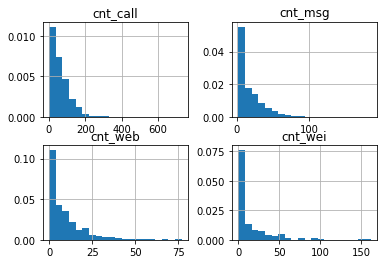

In [4]:
plt.figure(figsize=(8,4))

telecom.ix[:,'cnt_call':].hist(bins= 20,normed=True)

In [5]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

scale_tele = scale(telecom.iloc[:,1:])
pca = PCA(n_components=4)
pca.fit(scale_tele)
pca_tele = pca.transform(scale_tele)
pca.explained_variance_ratio_

array([0.62510442, 0.24620209, 0.12735854, 0.00133495])

In [6]:
from sklearn.metrics import adjusted_rand_score , silhouette_score
pca = PCA(n_components= 2)
pca_telecom = pca.fit_transform(scale_tele)
parameter = {'n_clusters':list(range(1,11))}
#for k in list(range(1,10)):
kmeans = KMeans(n_clusters=4)
labels = kmeans.fit(pca_telecom)
   # print(silhouette_score(pca_telecom,labels.labels_))

In [7]:
pd.DataFrame(pca_telecom).groupby(labels.labels_).count()

,0,1
0,364,364
1,147,147
2,65,65
3,24,24


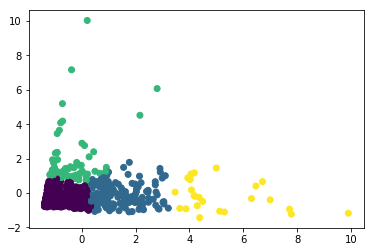

In [8]:
plt.scatter(pca_telecom[:,0],pca_telecom[:,1],c=labels.labels_)

In [9]:
# for k in list(range(2,10)):
#     kmeans=KMeans(n_clusters=k)
#     labels=kmeans.fit(pca_telecom)
#     print(silhouette_score(pca_telecom,labels.labels_))

对变量分布进行形态转换后聚类

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AFE9B43470>,
      dtype=object)

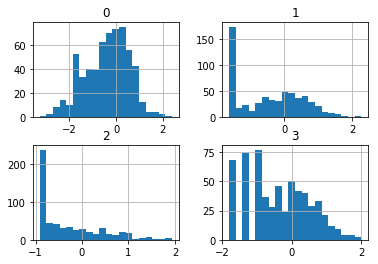

In [12]:
from sklearn.preprocessing import Normalizer

scale_norm_tele = np.log1p(scale_tele)
pd.DataFrame(scale_norm_tele).hist(bins=20)#,normed=True)
# plt.hist()

In [18]:
pca = PCA(n_components=2)
log_pca_score  = pca.fit(scale_norm_tele)
log_pca_score.explained_variance_ratio_
pca_score = log_pca_score.transform(scale_norm_tele)

In [20]:
log_pca_kmeans = KMeans(n_clusters= 3)
log_pca_kmeans.fit(pca_score)
silhouette_score(pca_score,log_pca_kmeans.labels_)

0.44733321827064876

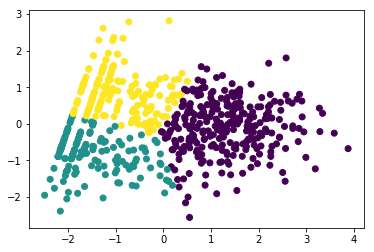

In [21]:
plt.scatter(pca_score[:,0],pca_score[:,1],c=log_pca_kmeans.labels_)

In [22]:
pd.DataFrame(pca_score).groupby(log_pca_kmeans.labels_).count()

,0,1
0,281,281
1,145,145
2,174,174


In [23]:
telecom.ix[:,1:].groupby(log_pca_kmeans.labels_).mean()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,cnt_call,cnt_msg,cnt_wei,cnt_web
0,72.359431,31.971530,30.099644,16.622776
1,14.510345,5.406897,0.910345,1.917241
2,97.235632,5.097701,1.695402,2.178161


In [26]:
group=telecom.ix[:,1:].groupby(log_pca_kmeans.labels_).mean().T

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


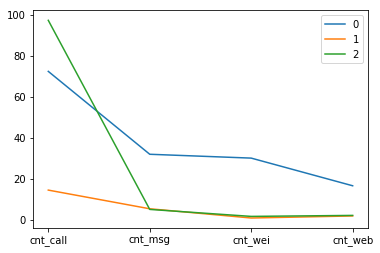

In [43]:
for i in range(3):
    plt.plot(group[i])
plt.legend()

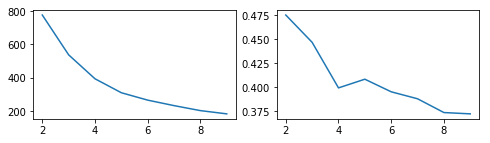

In [47]:
r2 = [];sil = []
for k in range(2,10):
    models = KMeans(n_clusters=k)
    models.fit(pca_score)
    r2.append(models.inertia_)
    sil.append(silhouette_score(pca_score,models.labels_))
plt.figure(figsize = (8,2))
plt.subplot(121)
plt.plot(range(2,10),r2)
plt.subplot(122)
plt.plot(range(2,10),sil)